In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### Data checks


In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("categoriees in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("categoriees in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("categoriees in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
categoriees in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categoriees in 'lunch' variable:   ['standard' 'free/reduced']
categoriees in 'test_preparation_course' variable:   ['none' 'completed']


In [13]:
numeric_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']


print('we have {} numerical features :{}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features :{}'.format(len(categorical_features),categorical_features))

we have 3 numerical features :['math_score', 'reading_score', 'writing_score']
we have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


###  Adding columns for "Total Score" and "Average"

In [14]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
writing_full=df[df['writing_score']==100]['average'].count()
reading_full=df[df['reading_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## Visualization

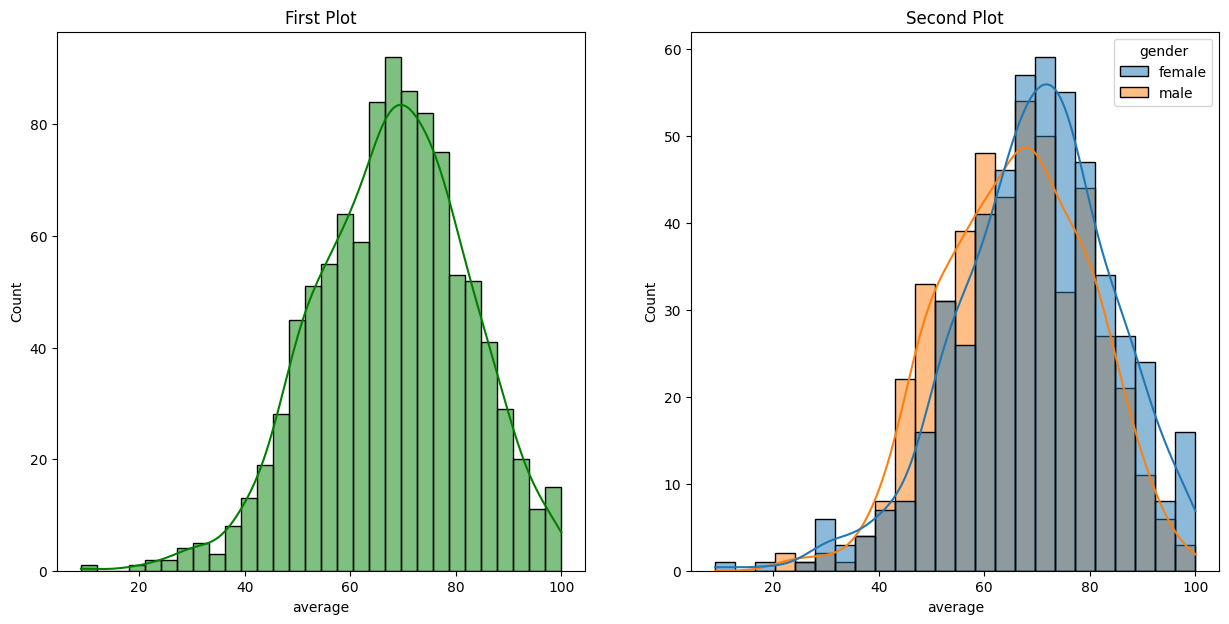

In [17]:
fig,axs=plt.subplots(1,2,figsize=(15,7))

axs[0].set_title("First Plot")
sns.histplot(data=df,x='average',bins=30,kde=True,color='g',ax=axs[0] )

axs[1].set_title("Second Plot")
sns.histplot(data=df,x='average',kde=True,hue='gender',ax=axs[1])
plt.show()

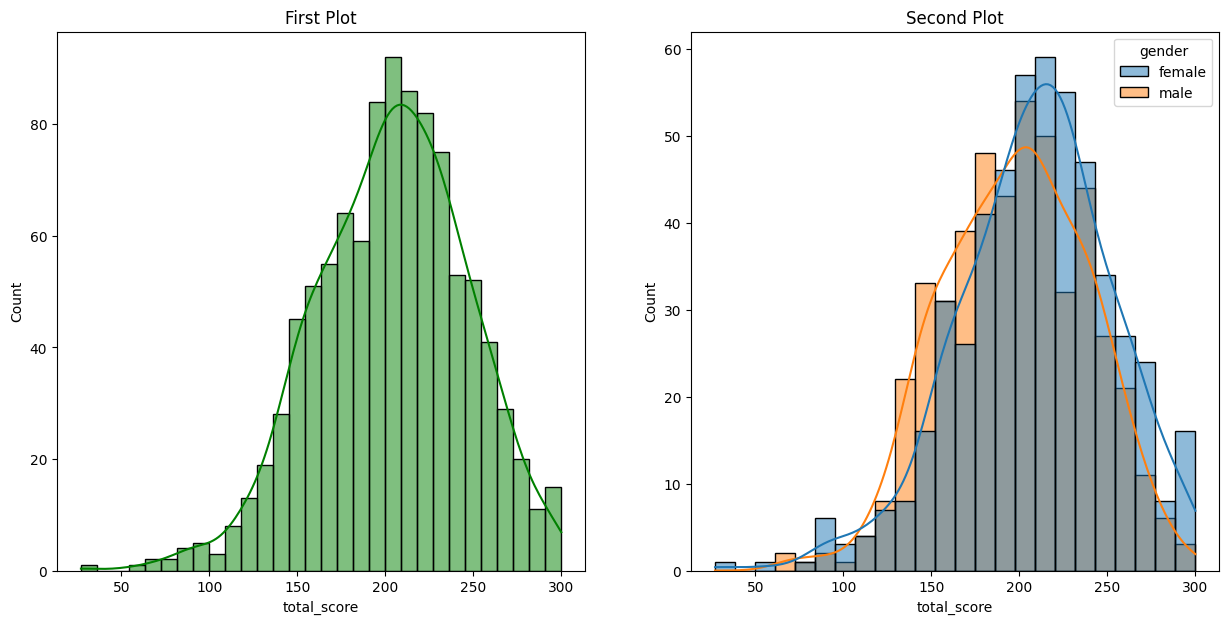

In [18]:
fig,axs=plt.subplots(1,2,figsize=(15,7))

axs[0].set_title("First Plot")
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g',ax=axs[0] )

axs[1].set_title("Second Plot")
sns.histplot(data=df,x='total_score',kde=True,hue='gender',ax=axs[1])
plt.show()

In [19]:
male_count = (df["gender"] == "male").sum()
female_count=(df["gender"]== "female").sum()
print(male_count)
print(female_count)

482
518


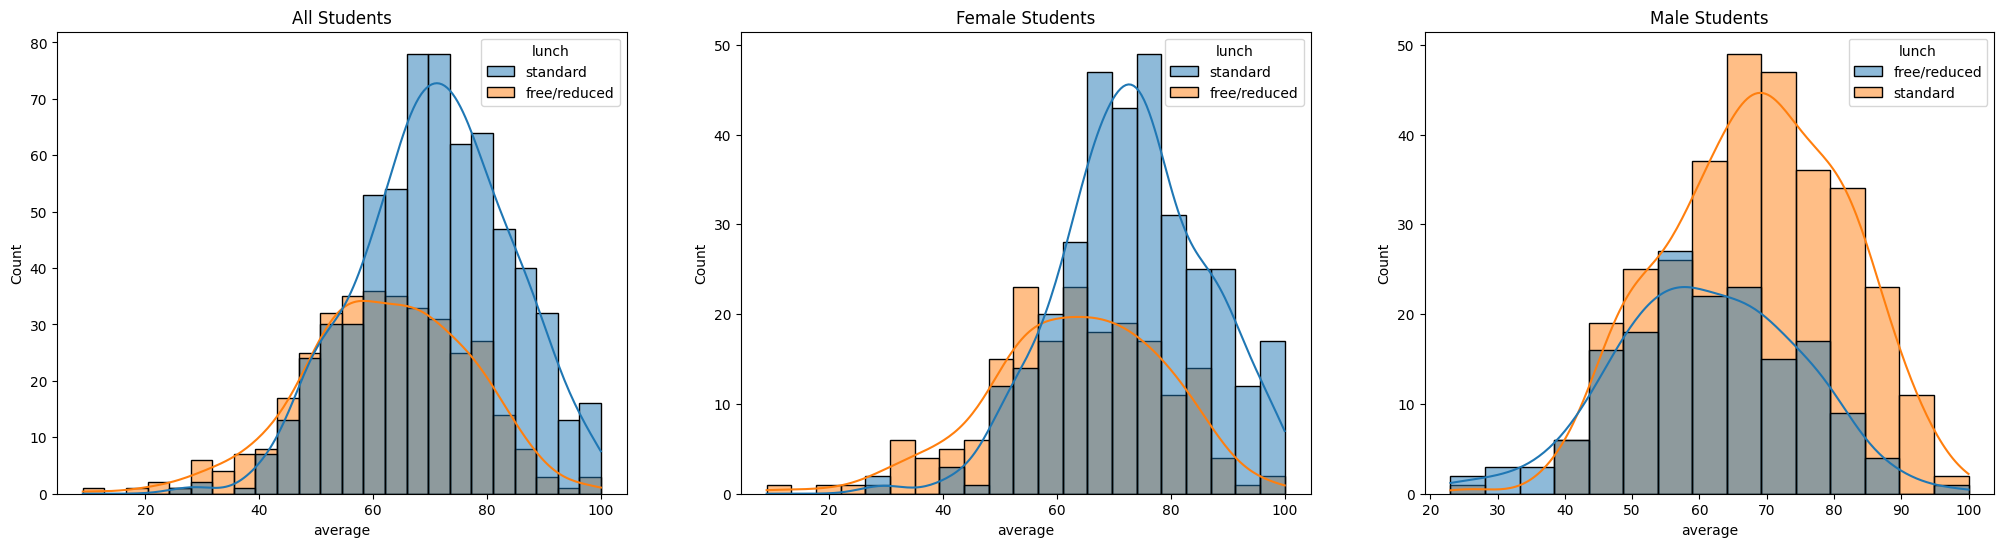

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# All students
sns.histplot(
    data=df,x="average",kde=True,hue="lunch",ax=axs[0]
)
axs[0].set_title("All Students")

# Female students
sns.histplot(
    data=df[df["gender"] == "female"],x="average",kde=True,hue="lunch",ax=axs[1]
)
axs[1].set_title("Female Students")

# Male students
sns.histplot(
    data=df[df["gender"] == "male"],x="average",kde=True,hue="lunch",ax=axs[2]
)
axs[2].set_title("Male Students")


plt.show()


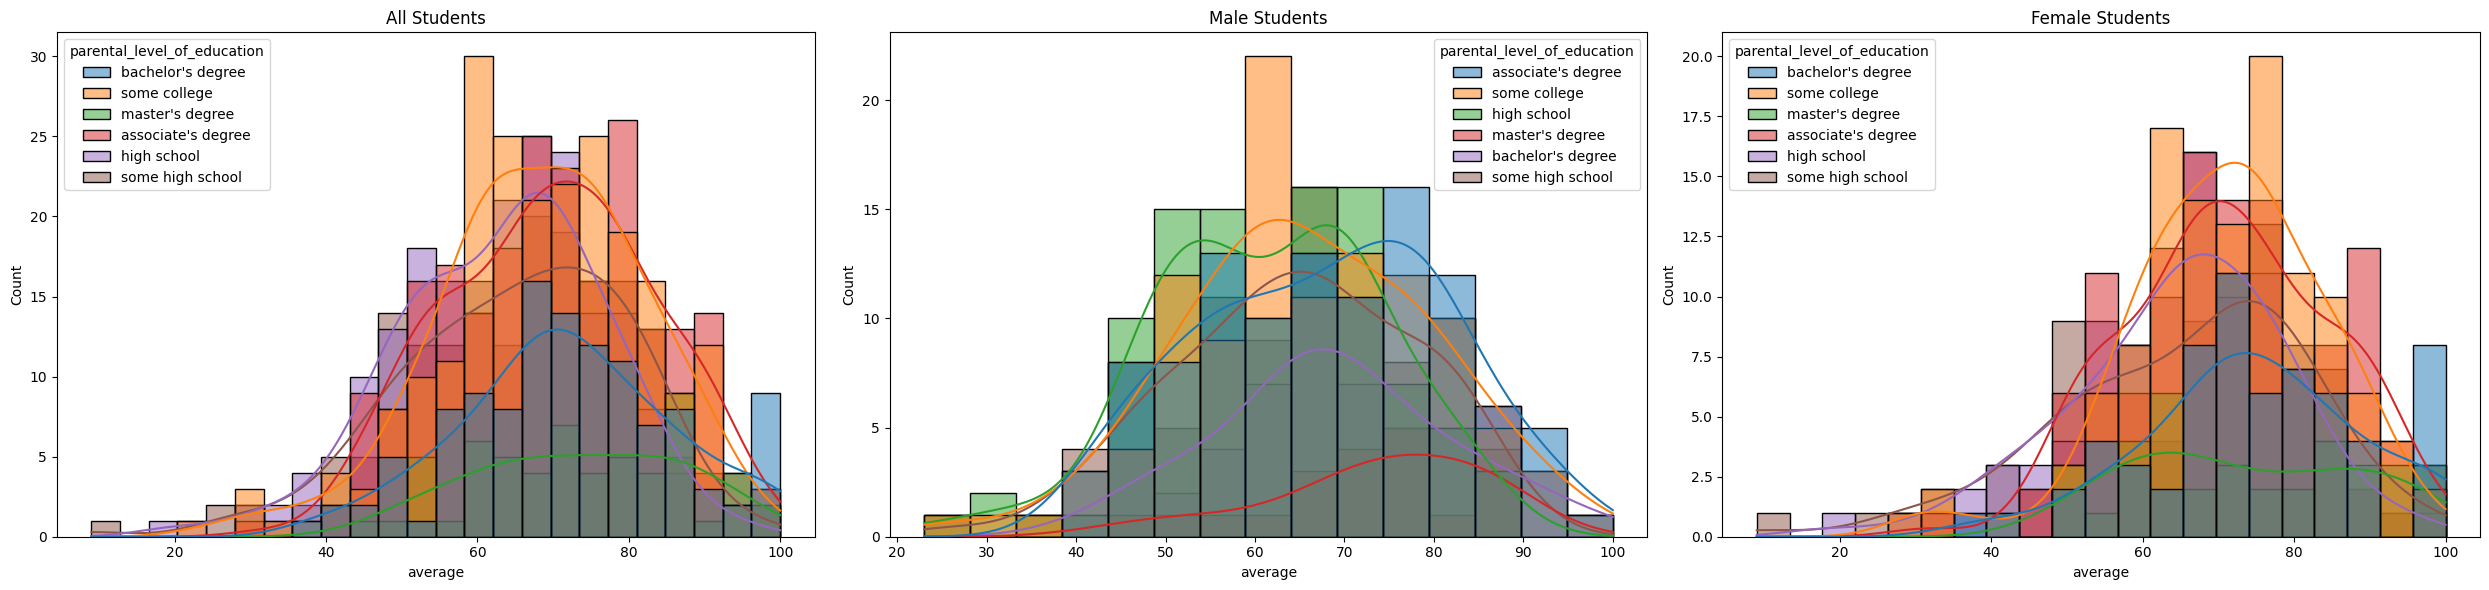

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# All students
sns.histplot(
    data=df,x="average",kde=True,hue="parental_level_of_education",ax=axs[0]
)
axs[0].set_title("All Students")

# Male students
sns.histplot(
    data=df[df["gender"] == "male"],x="average",kde=True,hue="parental_level_of_education",ax=axs[1]
)
axs[1].set_title("Male Students")

# Female students
sns.histplot(
    data=df[df["gender"] == "female"],x="average",kde=True,hue="parental_level_of_education",ax=axs[2]
)
axs[2].set_title("Female Students")

plt.tight_layout()
plt.show()


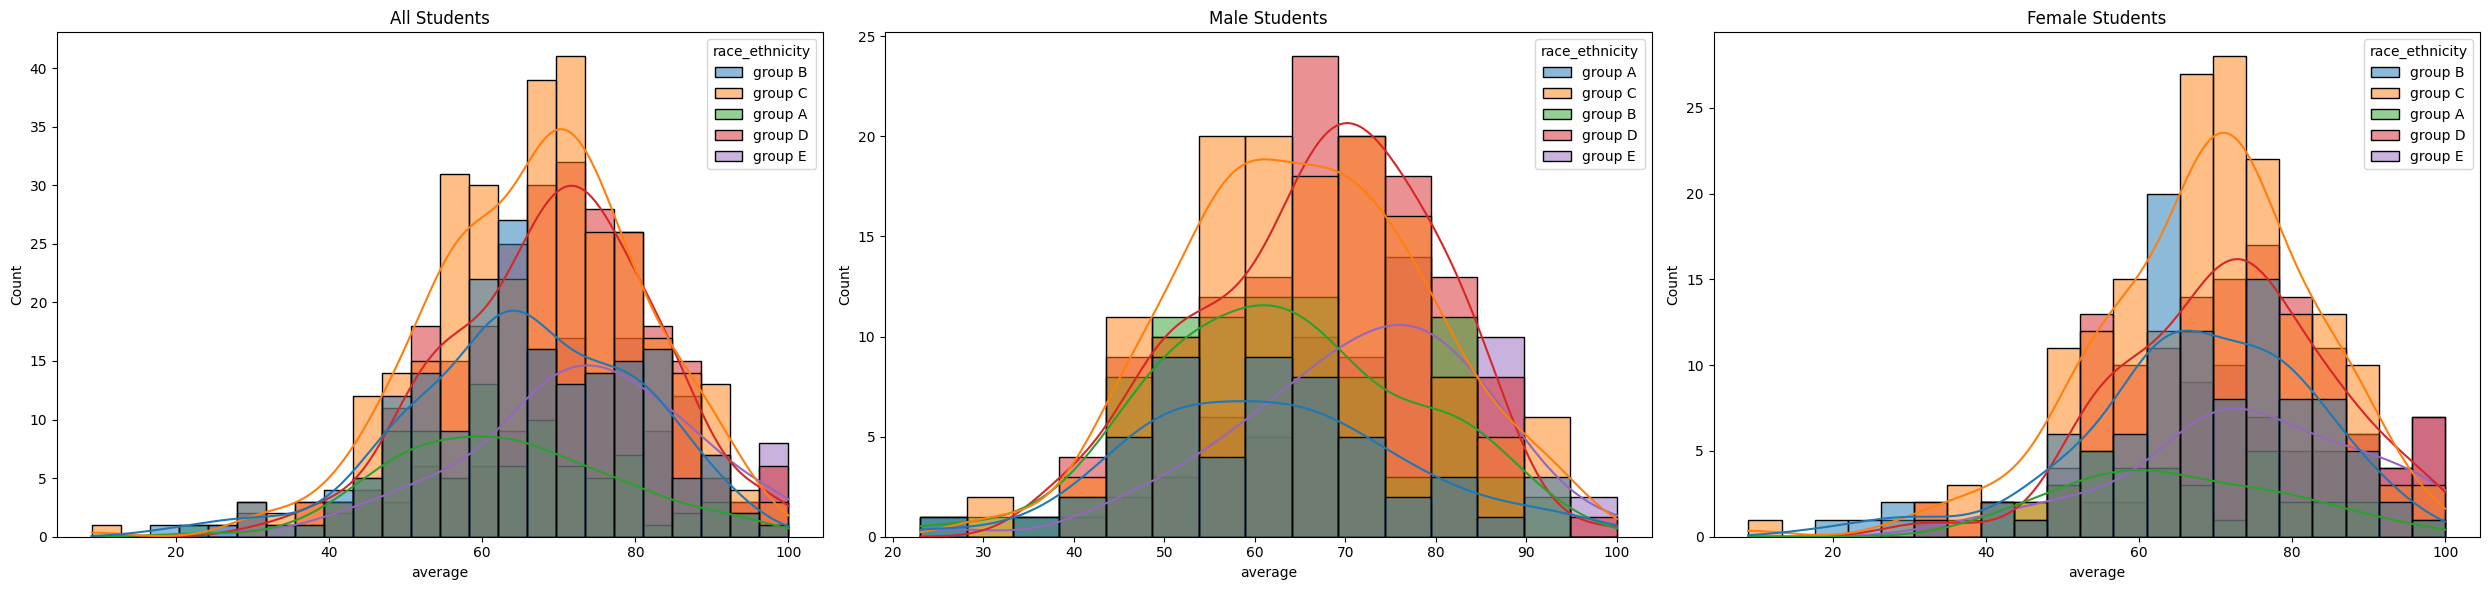

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# All students
sns.histplot(
    data=df,x="average",kde=True,hue="race_ethnicity",ax=axs[0]
)
axs[0].set_title("All Students")

# Male students
sns.histplot(
    data=df[df["gender"] == "male"],x="average",kde=True,hue="race_ethnicity",ax=axs[1]
)
axs[1].set_title("Male Students")

# Female students
sns.histplot(
    data=df[df["gender"] == "female"],x="average",kde=True,hue="race_ethnicity",ax=axs[2]
)
axs[2].set_title("Female Students")

plt.tight_layout()
plt.show()

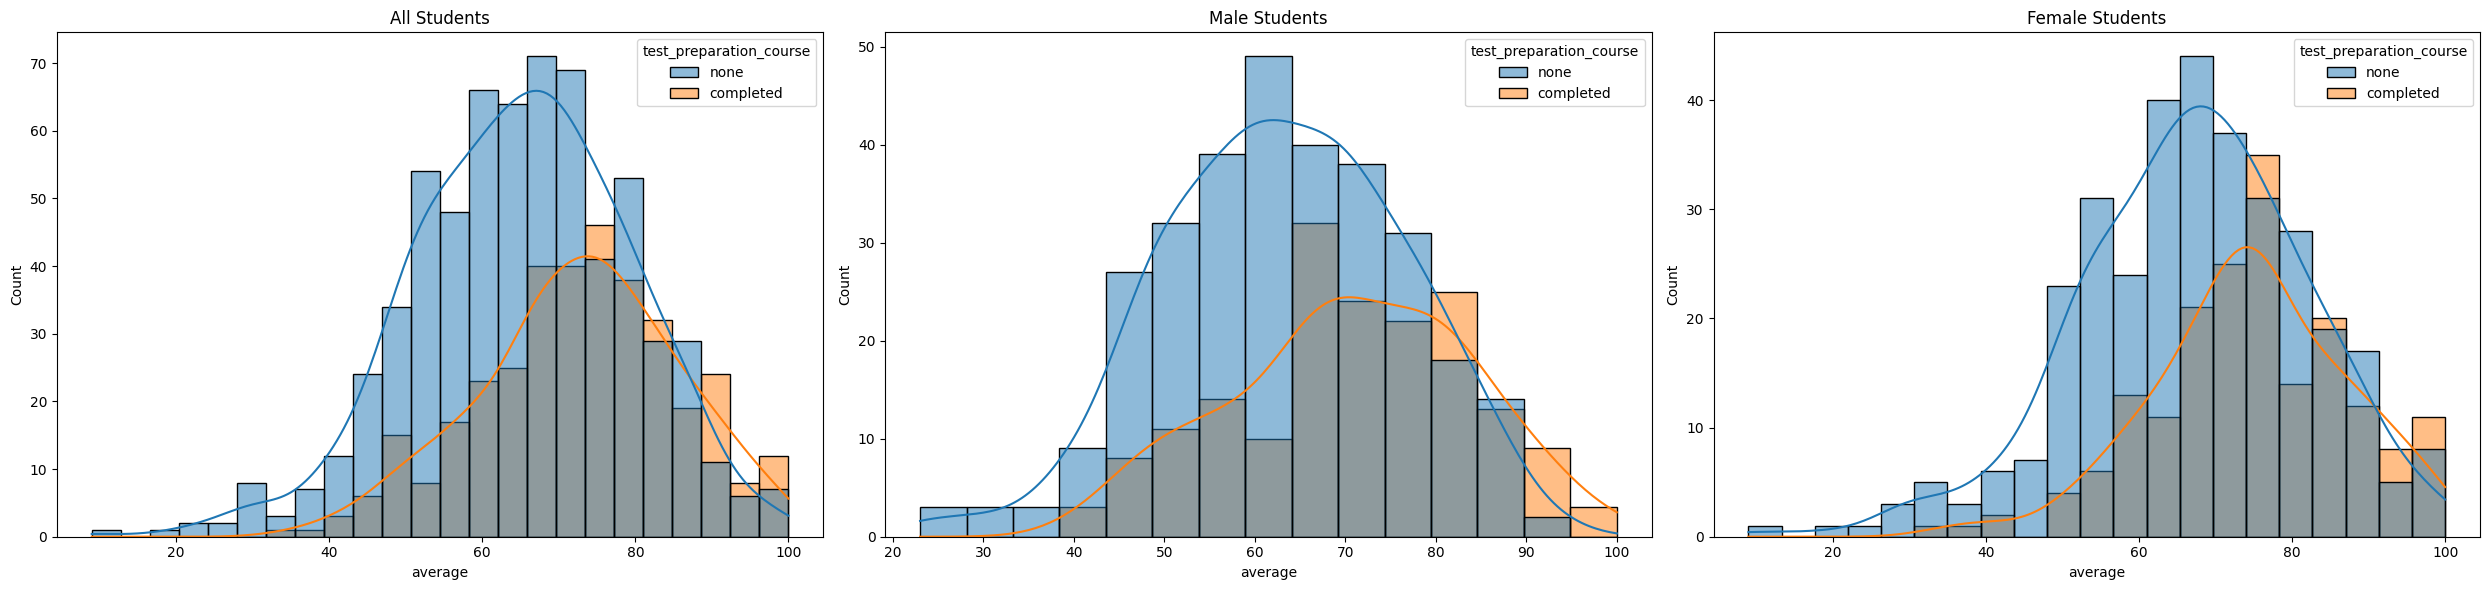

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# All students
sns.histplot(
    data=df,x="average",kde=True,hue="test_preparation_course",ax=axs[0]
)
axs[0].set_title("All Students")

# Male students
sns.histplot(
    data=df[df["gender"] == "male"],x="average",kde=True,hue="test_preparation_course",ax=axs[1]
)
axs[1].set_title("Male Students")

# Female students
sns.histplot(
    data=df[df["gender"] == "female"],x="average",kde=True,hue="test_preparation_course",ax=axs[2]
)
axs[2].set_title("Female Students")

plt.tight_layout()
plt.show()

There is no effect of preparation_course nither on male nor on female

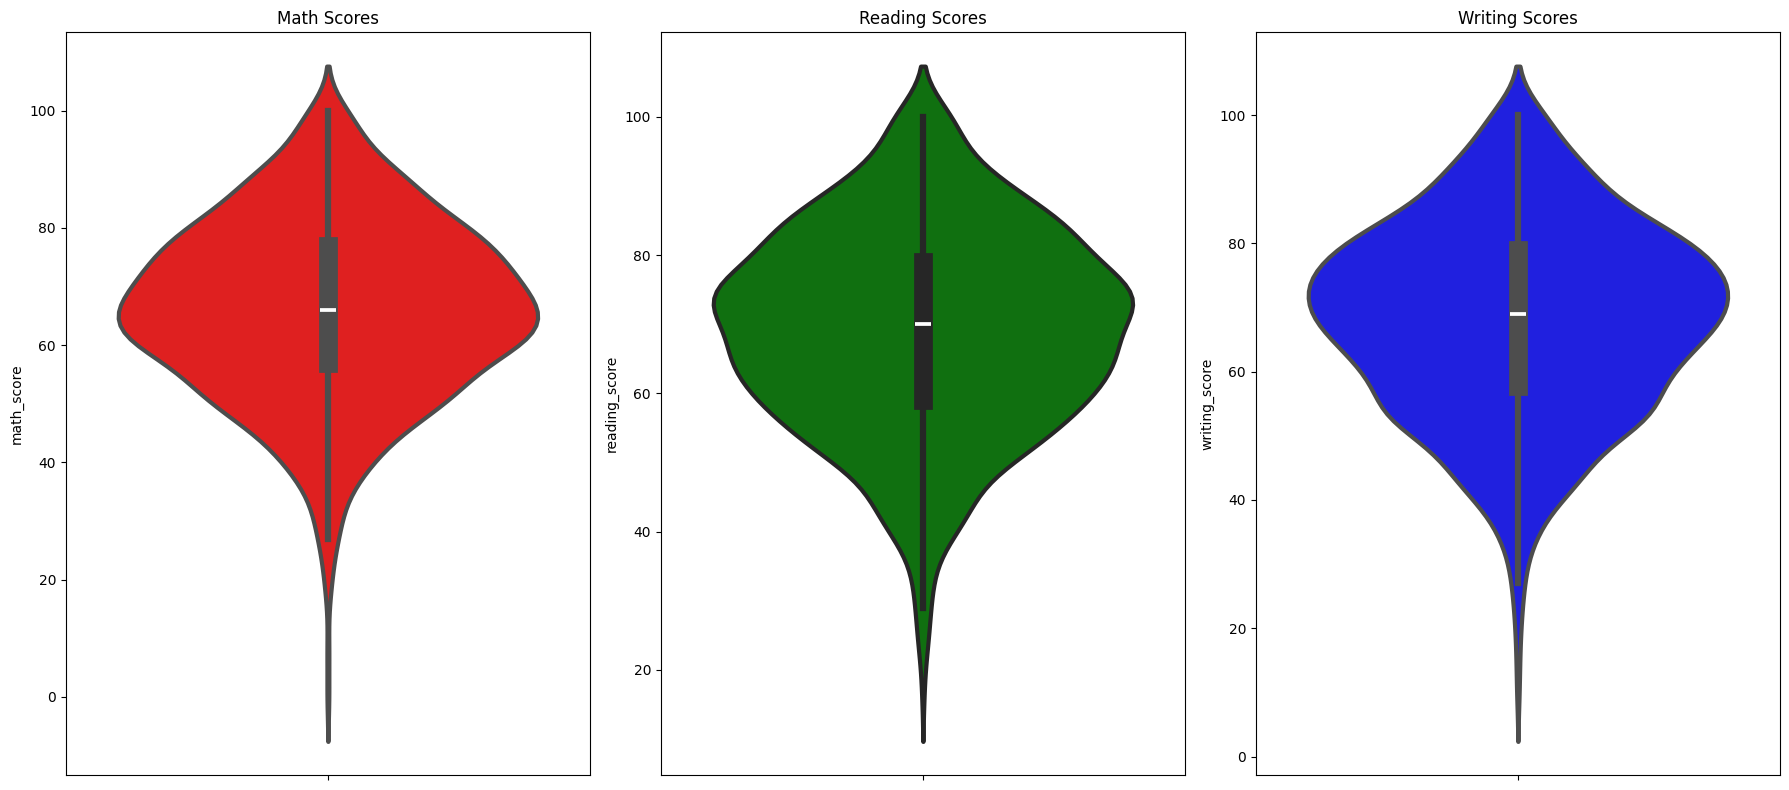

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Math
sns.violinplot(
    y="math_score",data=df,color="red",linewidth=3,ax=axs[0]
)
axs[0].set_title("Math Scores")

# Reading
sns.violinplot(
    y="reading_score",data=df,color="green",linewidth=3,ax=axs[1]
)
axs[1].set_title("Reading Scores")

# Writing
sns.violinplot(
    y="writing_score",data=df,color="blue",linewidth=3,ax=axs[2]
)
axs[2].set_title("Writing Scores")

plt.tight_layout()
plt.show()


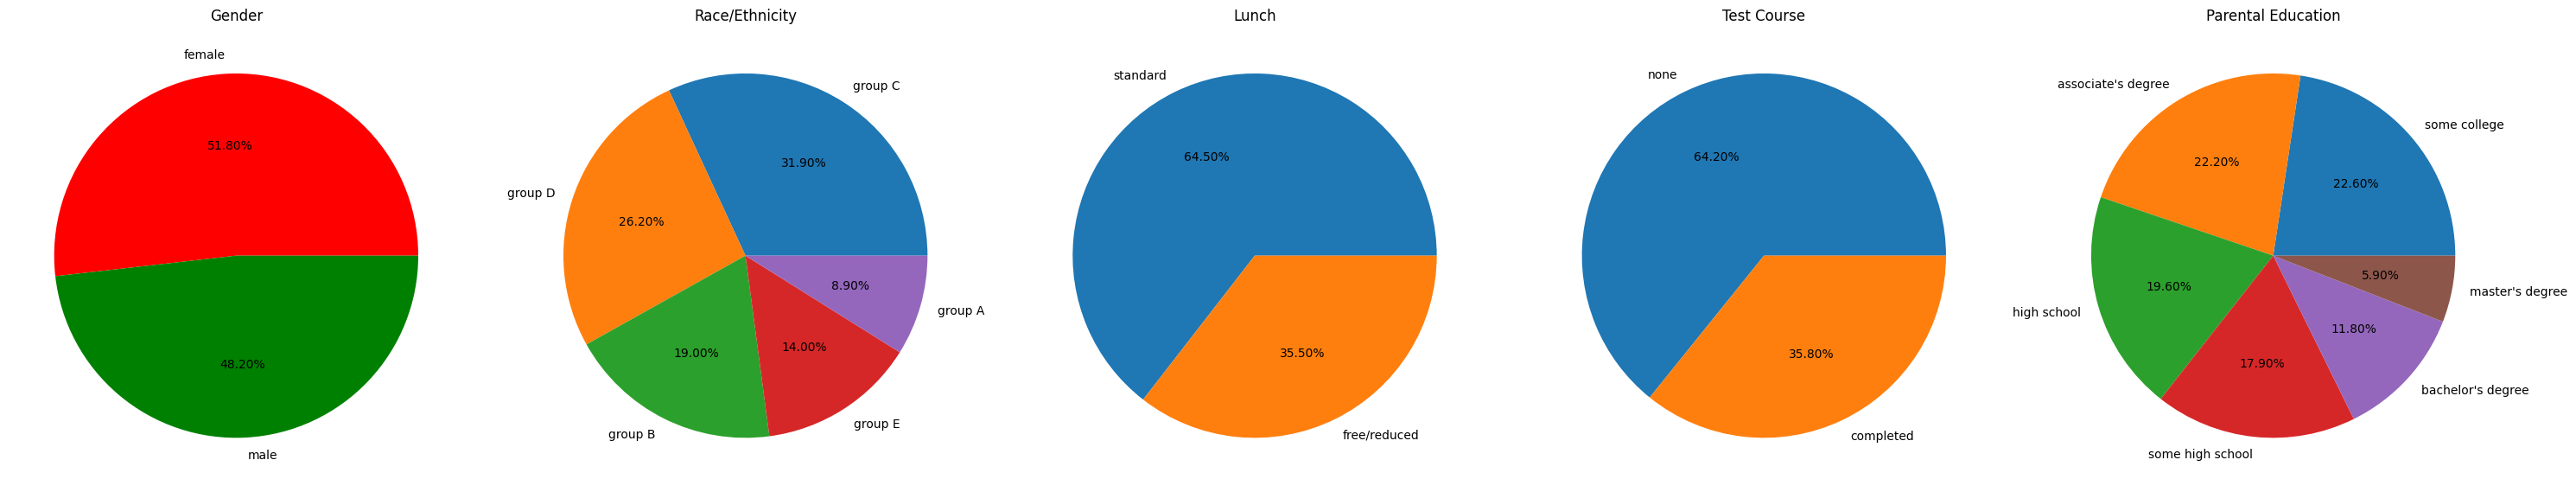

In [25]:
fig, axs = plt.subplots(1, 5, figsize=(30, 12))

# Gender
size = df["gender"].value_counts()
axs[0].pie(
    size,
    labels=size.index,
    autopct="%.2f%%",
    colors=["red", "green"]
)
axs[0].set_title("Gender")
axs[0].axis("off")


# Race/Ethnicity
size = df["race_ethnicity"].value_counts()
axs[1].pie(
    size,
    labels=size.index,
    autopct="%.2f%%"
)
axs[1].set_title("Race/Ethnicity")
axs[1].axis("off")


# Lunch
size = df["lunch"].value_counts()
axs[2].pie(
    size,
    labels=size.index,
    autopct="%.2f%%"
)
axs[2].set_title("Lunch")
axs[2].axis("off")


# Test Course
size = df["test_preparation_course"].value_counts()
axs[3].pie(
    size,
    labels=size.index,
    autopct="%.2f%%"
)
axs[3].set_title("Test Course")
axs[3].axis("off")


# Parental Education
size = df["parental_level_of_education"].value_counts()
axs[4].pie(
    size,
    labels=size.index,
    autopct="%.2f%%"
)
axs[4].set_title("Parental Education")
axs[4].axis("off")


plt.tight_layout()
plt.show()


## Feature wise visualization

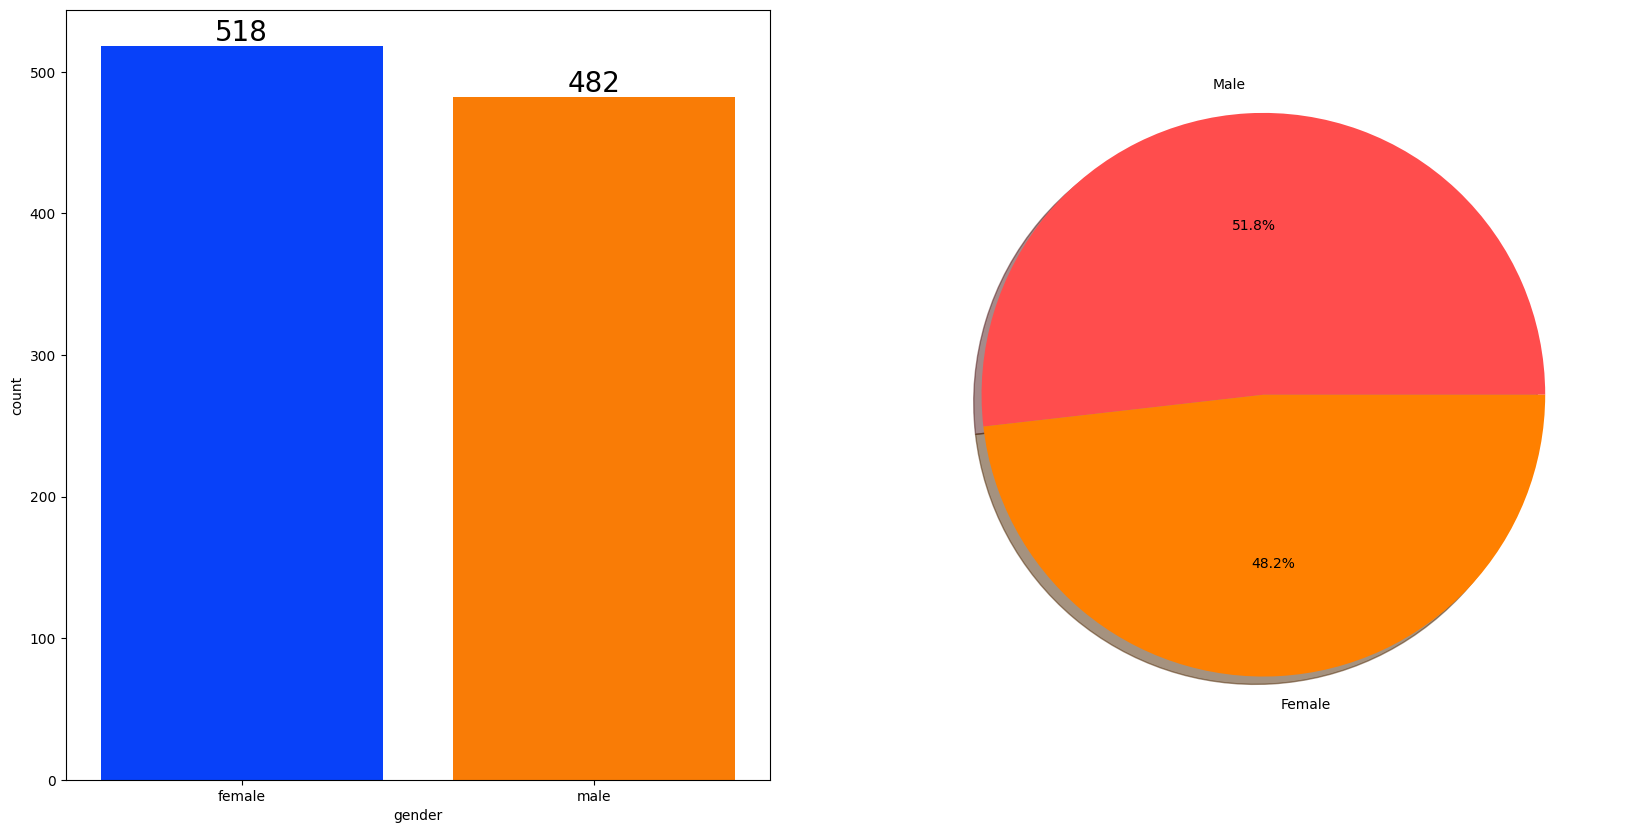

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',explode=[0,0],shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [38]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


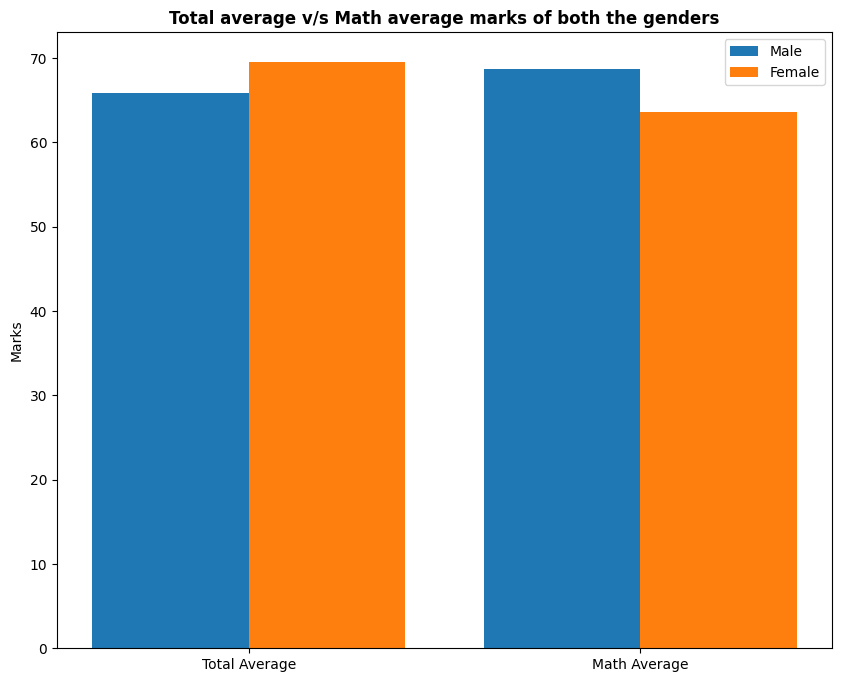

In [40]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Analysis based on ethinicity

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


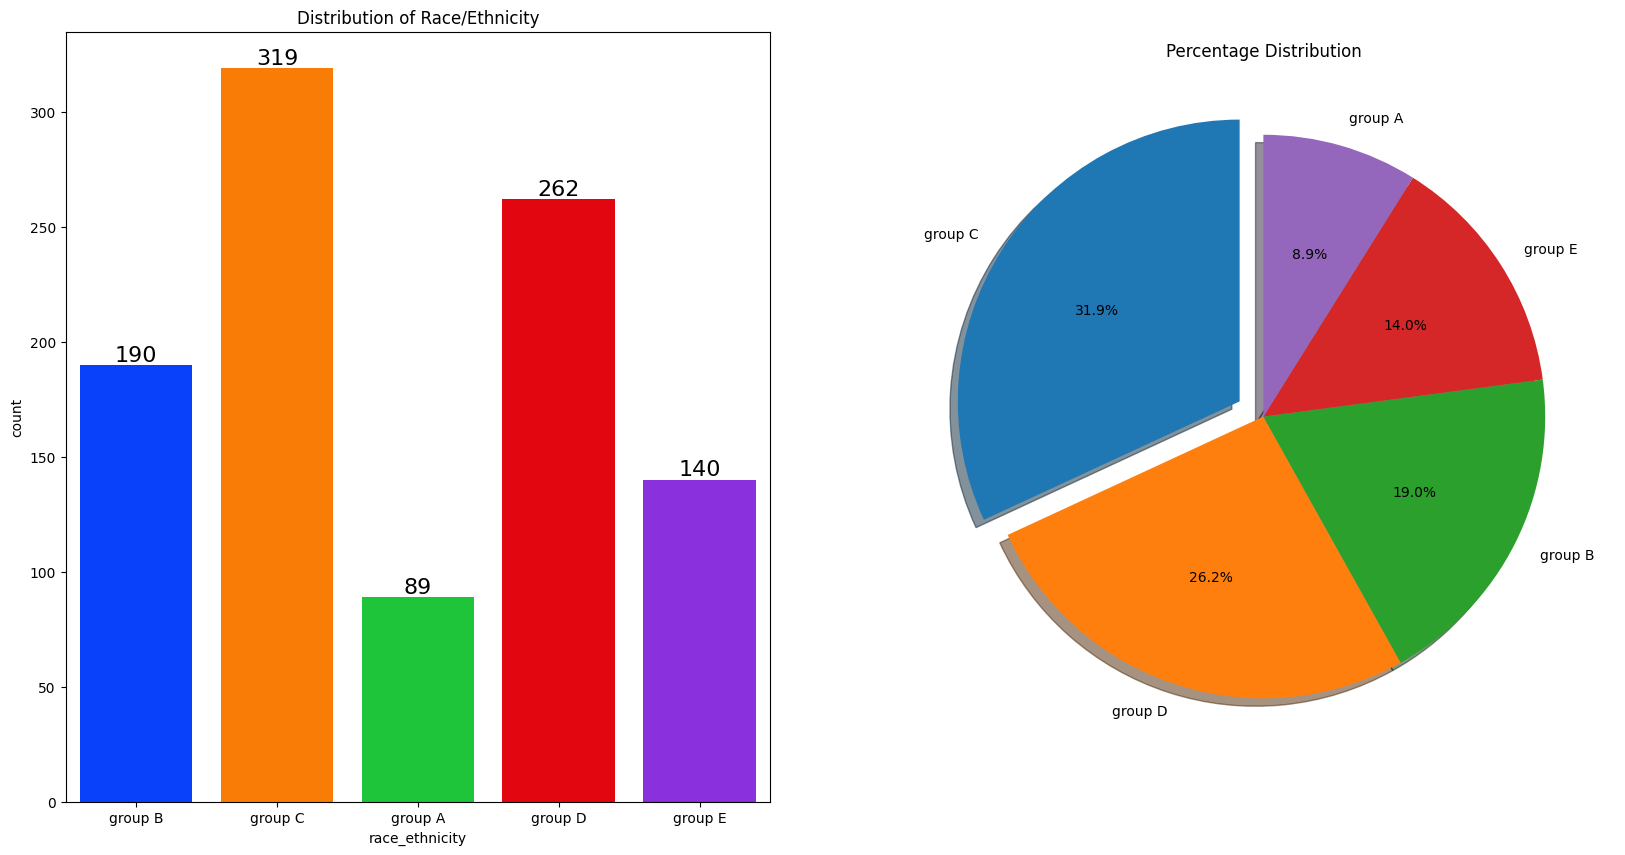

In [47]:
f, ax = plt.subplots(1, 2, figsize=(20,10))

# Bar Chart
sns.countplot(
    x='race_ethnicity',data=df,palette='bright',ax=ax[0],saturation=0.95
)

for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=16)

ax[0].set_title("Distribution of Race/Ethnicity")


# Pie Chart
counts = df['race_ethnicity'].value_counts()
print(counts)

ax[1].pie(
    counts,labels=counts.index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,startangle=90
)

ax[1].set_title("Percentage Distribution")
plt.show()   

In [50]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


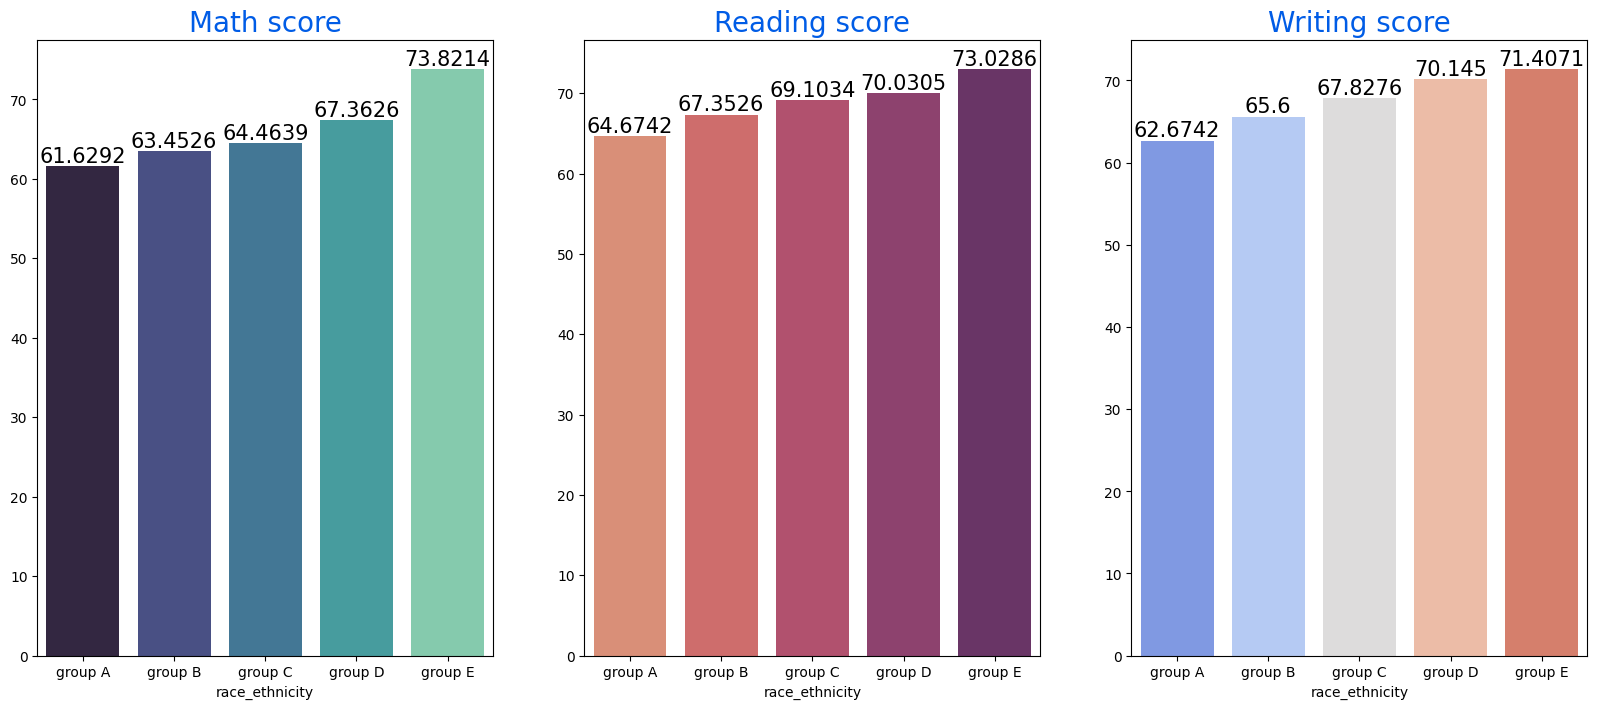

In [51]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Parental level of education


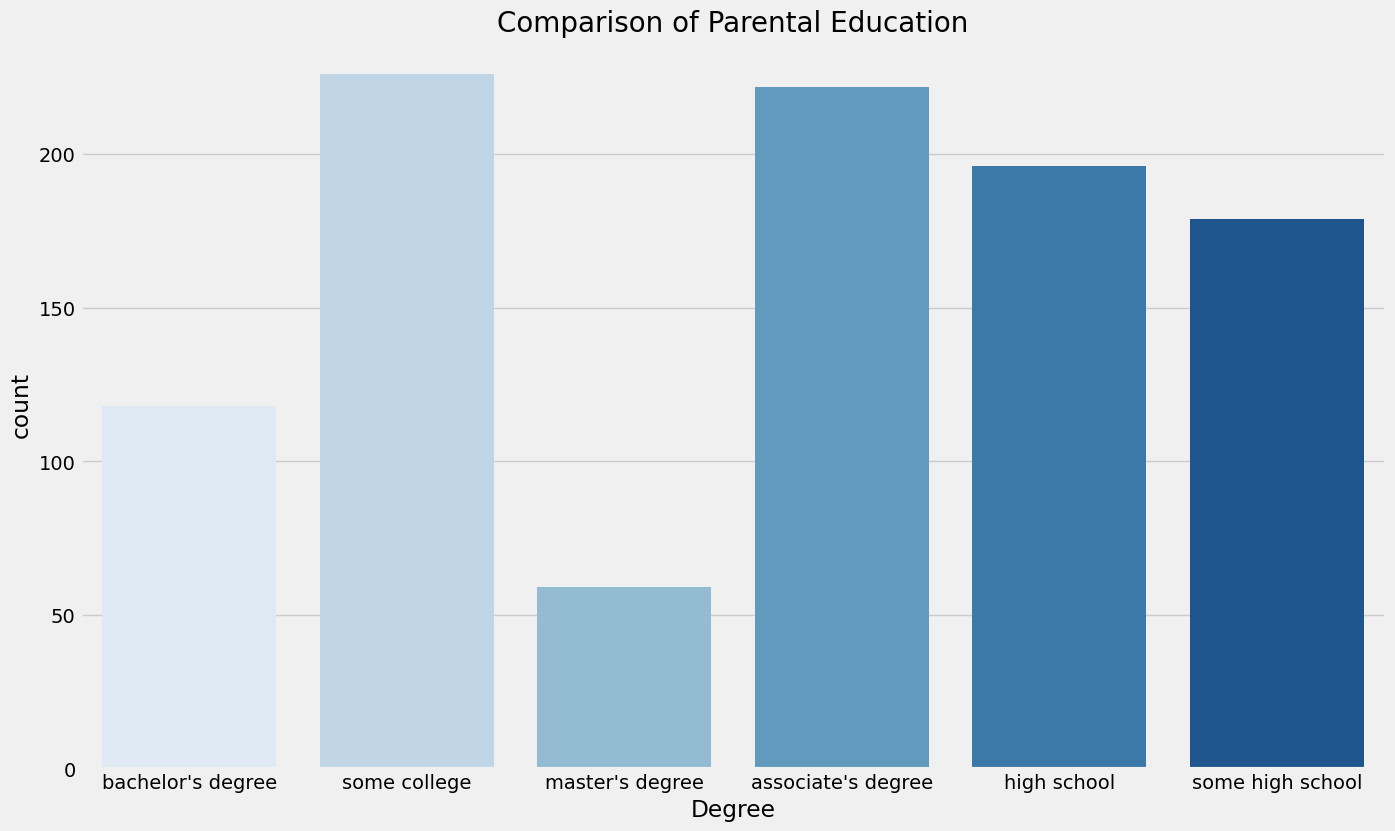

In [ ]:
plt.figure(figsize=(15, 9))
sns.countplot(x='parental_level_of_education', data=df,palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

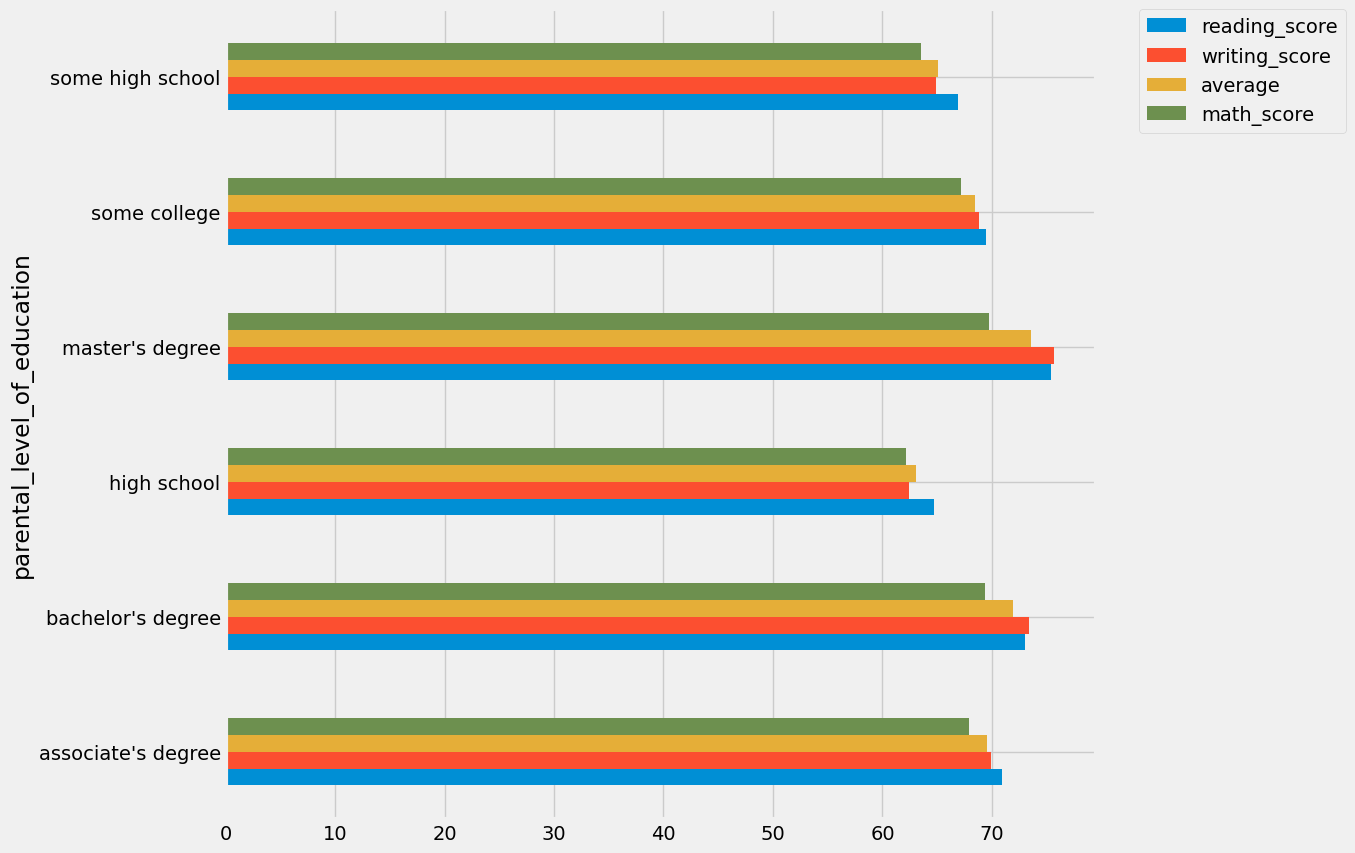

In [67]:
cols = ['reading_score', 'writing_score','average','math_score']
df.groupby('parental_level_of_education')[cols].mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Lunch Col

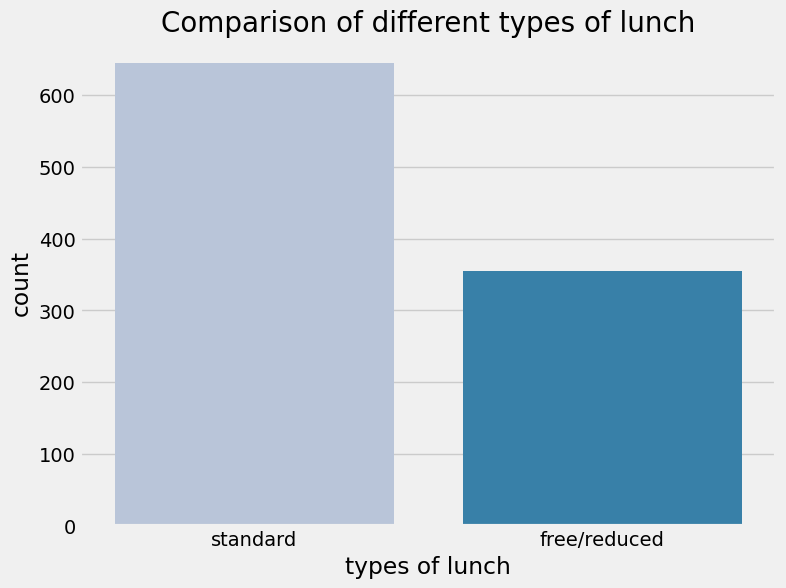

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x='lunch',data=df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

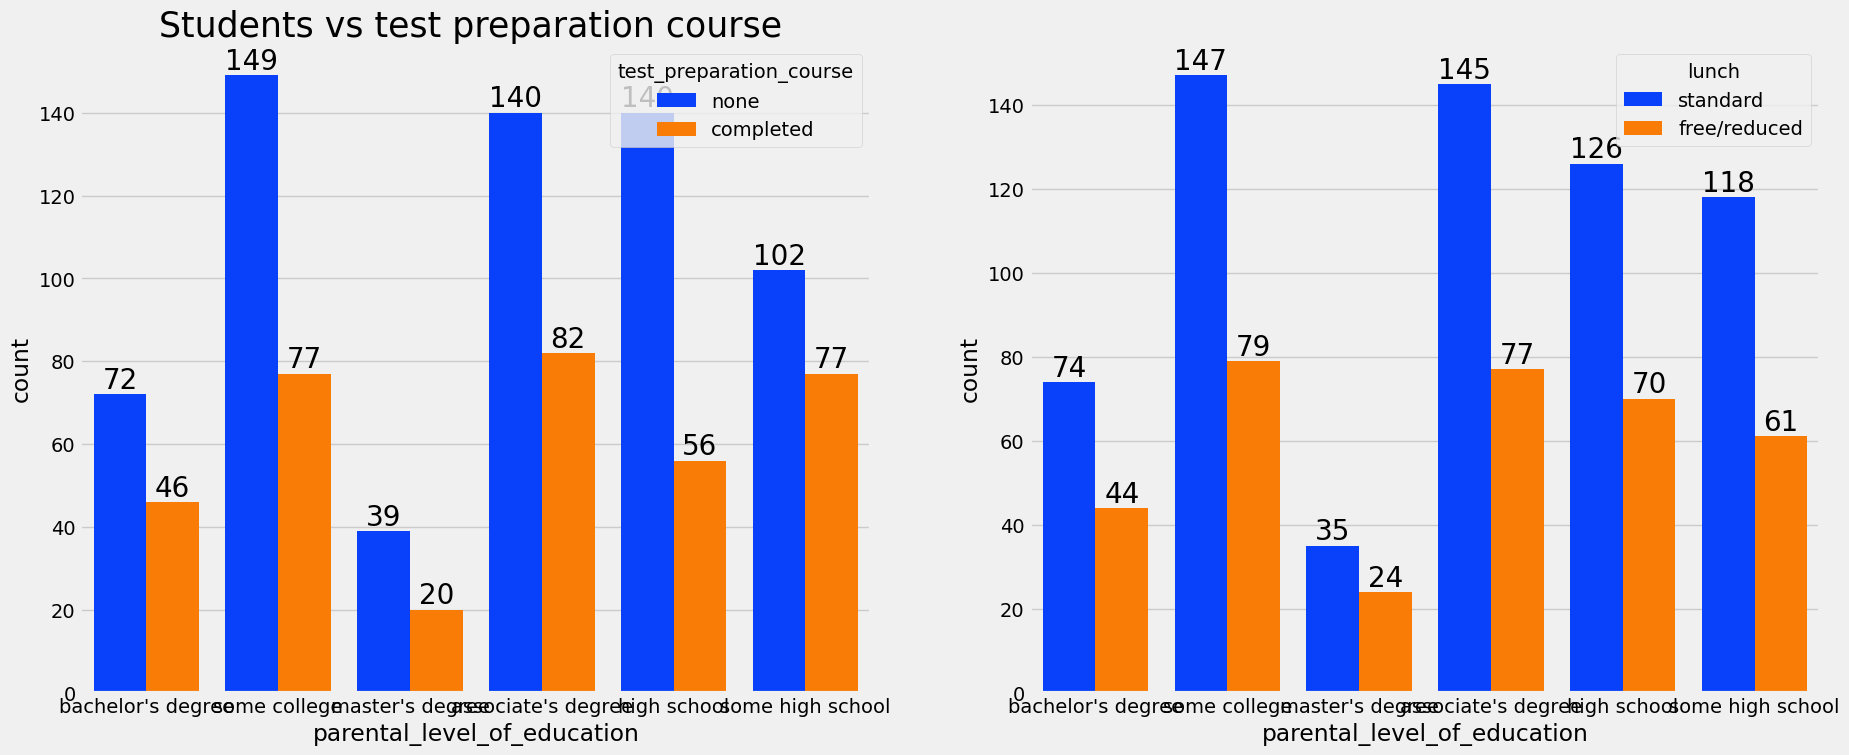

In [73]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

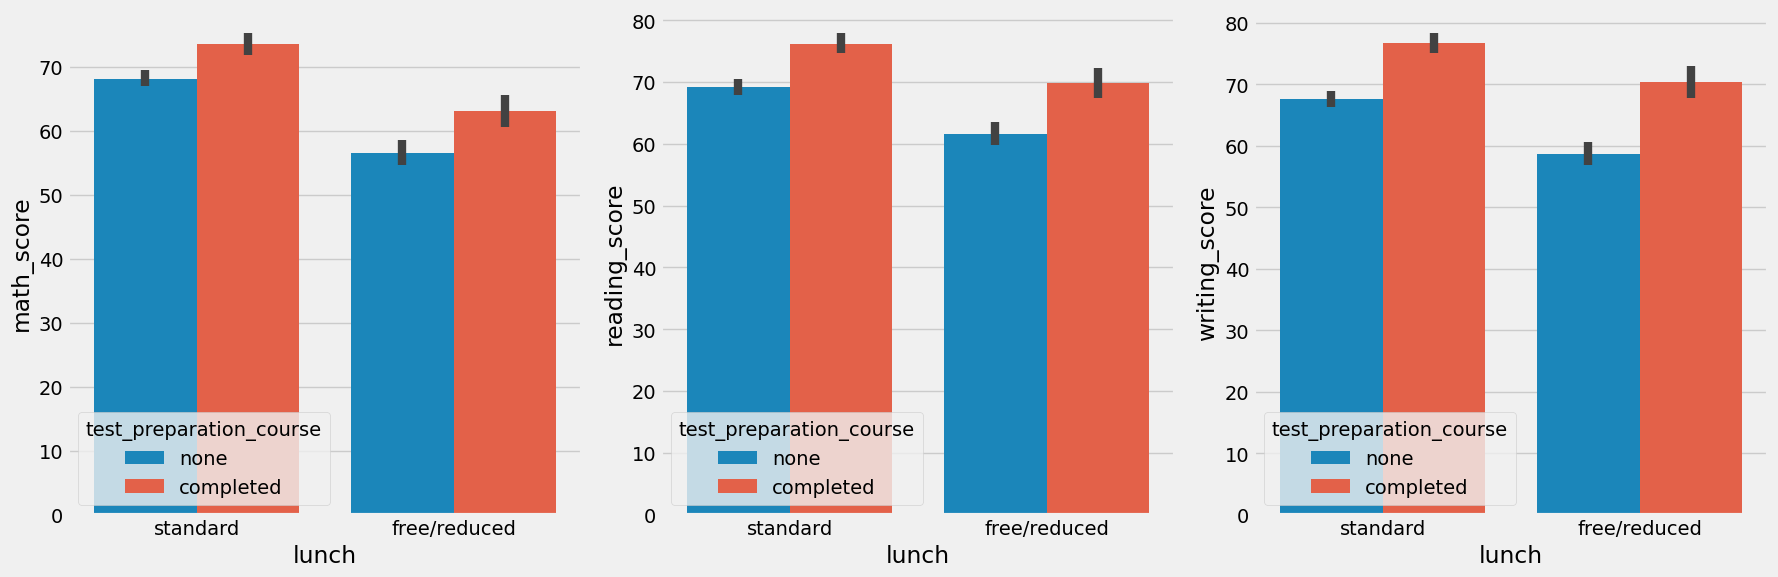

In [75]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])

plt.subplot(1,3,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])

plt.subplot(1,3,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

plt.tight_layout()
plt.show()


## Outlier checking

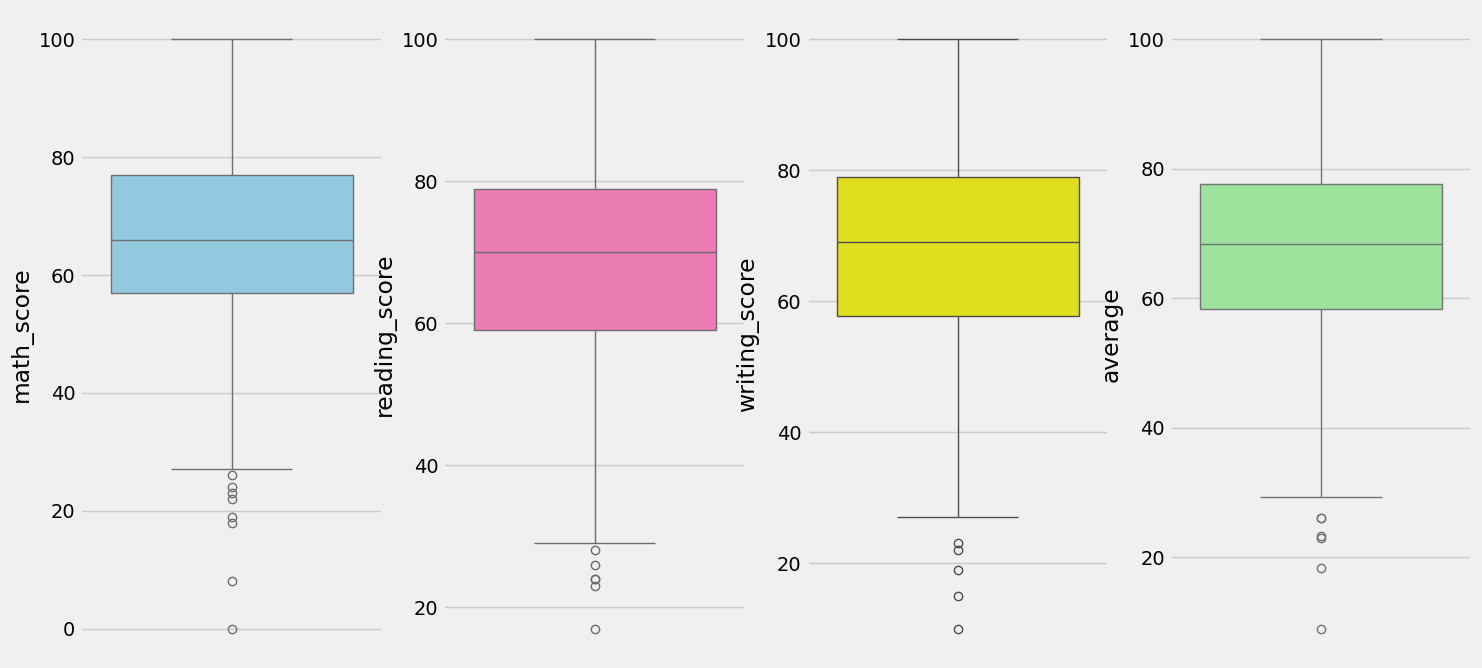

In [78]:
plt.subplots(1,4,figsize=(16,8))

plt.subplot(141)
sns.boxplot(y='math_score', data=df, color='skyblue')

plt.subplot(142)
sns.boxplot(y='reading_score', data=df, color='hotpink')

plt.subplot(143)
sns.boxplot(y='writing_score', data=df, color='yellow')

plt.subplot(144)
sns.boxplot(y='average', data=df, color='lightgreen')

plt.show()


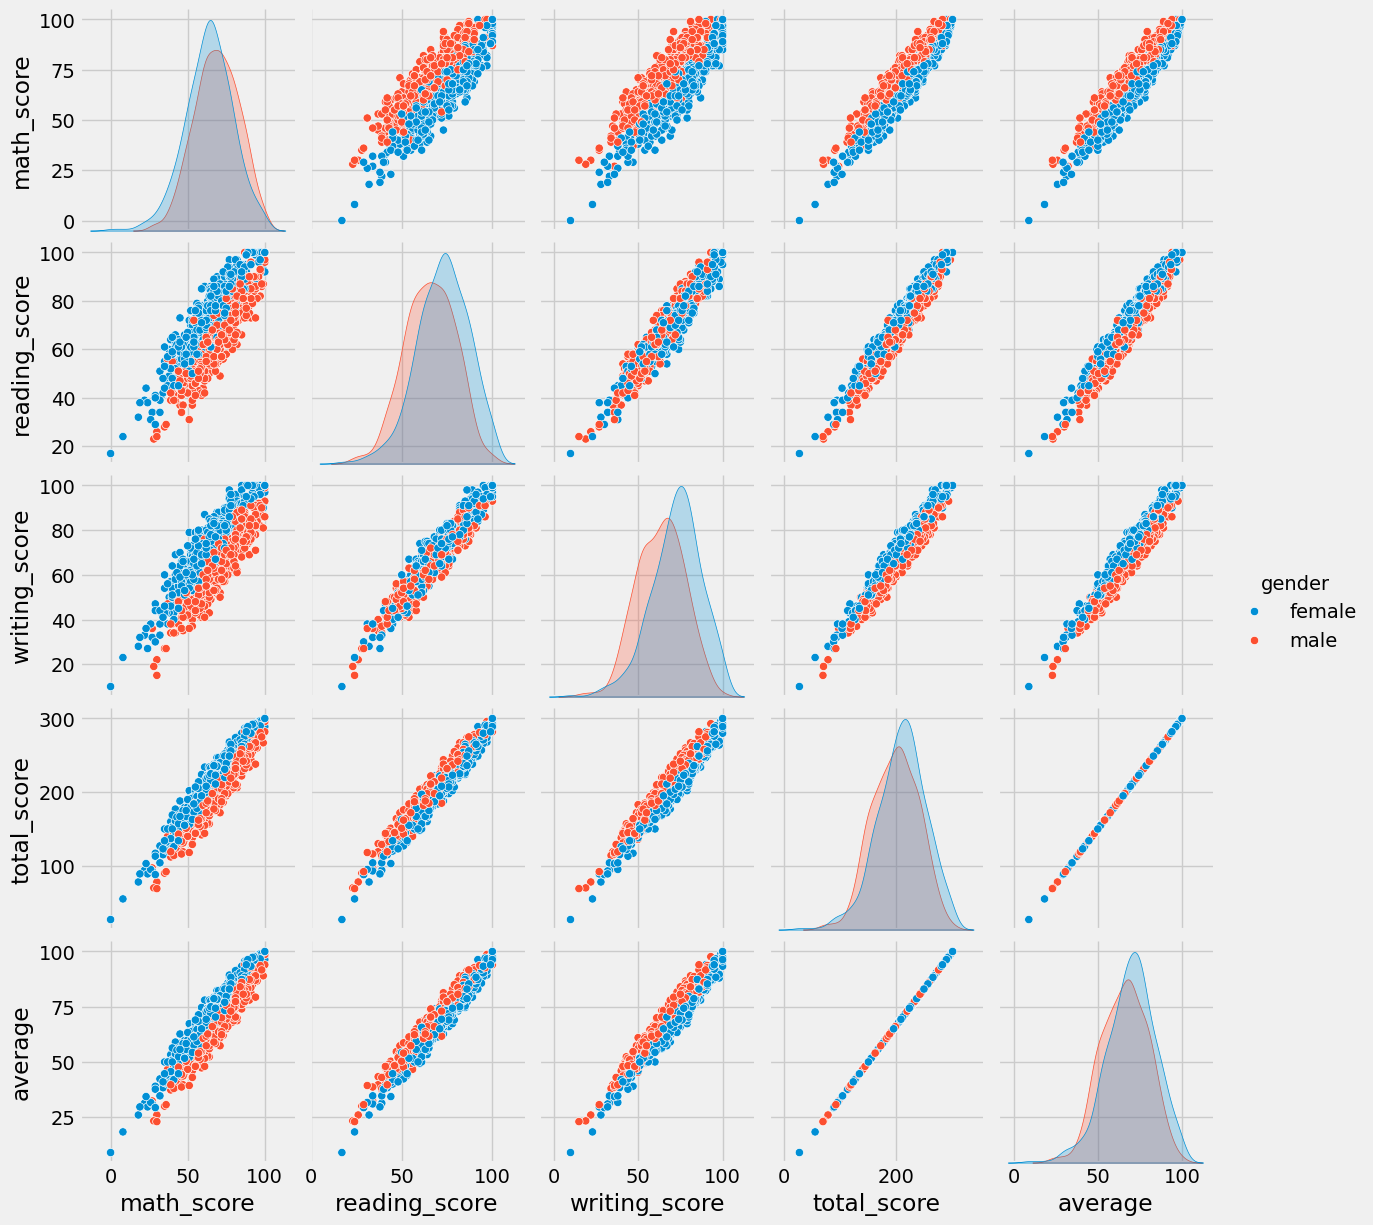

In [79]:
sns.pairplot(df,hue = 'gender')
plt.show()

###### Insight
- Since the nature of data is linear and outlier does not effect the distribution need not to remove any outlier as it seems harmless